In diesem Notebook geht es darum, dass datenset genauer zu betrachen. Erstmal einfach in Grafen und Zahlen um sich eine Übersicht über die Daten zu verschaffen.
Erste leitfragen für mich sind:
- gibt es generelle Umsatzmuster in den Warengruppen abhängig vom Wochentag?
    - Antwort: Ja gibt es. Samstag uns Sonntag sind die umsatzstärksten Tage. Man sieht auch sehr, dass am Sonntag viel weniger Brot als normal verkauft wird.
- wie/ob hängen die Umsätze/Umsätze der einzelnen Waremgruppen vom Wetter ab
    - Was hat dabei den größen Einflus? (Temperatur, Sonnestunden)
- haben Anläufe on Kreuzfahrtschiffen einen Einfluss auf den Umsatz?
    - ein einfache lineare regression sagt ja 
- wie entwickeln sich die Umsätze über ein Jahr, bzw über die Jahre
    - man kann sehene, dass Juli und August die umsatzstärksten Monate in der Bäckerei sind. Von januar bis August steigt der gesamtumsatz pro monat an. Danach fällt er bis dezember ab.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
import statsmodels.formula.api as smf

In [21]:
#import data
data = pd.read_csv('../0_DataPreparation/data.csv')

#split data in smal df for each year to make it easier to work with
#extracting the year from the date
data['year'] = pd.DatetimeIndex(data['Datum']).year
data['month'] = pd.DatetimeIndex(data['Datum']).month
data['day'] = pd.DatetimeIndex(data['Datum']).day
#get the name of the day
data['Wochentag'] = pd.to_datetime(data['Datum']).dt.day_name()
data_2013= data[data['year'] == 2013]
data_2014= data[data['year'] == 2014]
data_2015= data[data['year'] == 2015]
data_2016= data[data['year'] == 2016]
data_2017= data[data['year'] == 2017]
print(data_2014.head())


          Datum        Brot   Broetchen   Croissant  Konditorei      Kuchen  \
181  2014-01-02  153.166492  449.418219  142.307971   71.729584  257.525894   
182  2014-01-03  109.484764  405.814478   99.605815  111.358444  227.913159   
183  2014-01-04  116.250540  408.762961  176.104155  104.673189  262.179157   
184  2014-01-05   67.789991  529.982266  178.657856  124.764364  242.820622   
185  2014-01-06  146.911068  299.874481   96.441342  104.294207  247.848021   

     Saisonbrot  Umsatz_total  Temp_Very_Cold  Temp_Cold  ...  Ship  \
181   35.620197          1109               0          1  ...     0   
182    0.000000           954               0          1  ...     0   
183    0.000000          1067               0          1  ...     0   
184    0.000000          1144               0          1  ...     0   
185    0.000000           895               0          1  ...     1   

     Heimspiel  Feiertag  is_holiday  Weihnachtsmarkt  Markt  year  month  \
181          0       

In [22]:
#gesamtumsatz von 2014 nach monaten als barplot

def plot_gesamtumsatz(data, year):
    data_grouped = data.groupby('month').sum().reset_index()
    data_grouped = data_grouped.rename(columns={'Umsatz_total': 'Gesamtumsatz'})
    
    fig = px.bar(data_grouped, x='month', y=['Brot', 'Broetchen', 'Kuchen', 'Konditorei', 'Saisonbrot', 'Croissant'], title=f'Umsatz {year} nach Monaten')
    fig.update_xaxes(title_text='Monat')
    fig.update_yaxes(title_text='Umsatz in Euro')
    fig.update_xaxes(tickvals=[1,2,3,4,5,6,7,8,9,10,11,12], ticktext=['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember'])
    fig.show()

plot_gesamtumsatz(data_2014, 2014)
plot_gesamtumsatz(data_2015, 2015)
plot_gesamtumsatz(data_2016, 2016)
plot_gesamtumsatz(data_2017, 2017)


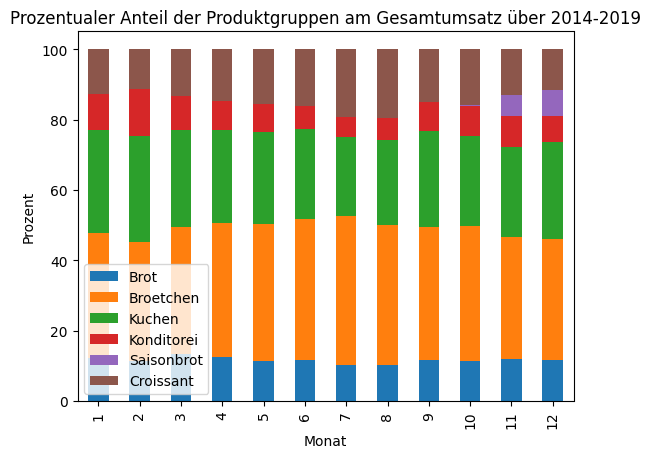

In [23]:
#calculate the percentage od each product group of the total sales
def calculate_percentage(data):
    data_grouped1 = data.groupby('month').sum().reset_index()
    data_grouped1 = data_grouped1.rename(columns={'Umsatz_total': 'Gesamtumsatz'})
    data_grouped1['Brot'] = data_grouped1['Brot']/data_grouped1['Gesamtumsatz']*100
    data_grouped1['Broetchen'] = data_grouped1['Broetchen']/data_grouped1['Gesamtumsatz']*100
    data_grouped1['Kuchen'] = data_grouped1['Kuchen']/data_grouped1['Gesamtumsatz']*100
    data_grouped1['Konditorei'] = data_grouped1['Konditorei']/data_grouped1['Gesamtumsatz']*100
    data_grouped1['Saisonbrot'] = data_grouped1['Saisonbrot']/data_grouped1['Gesamtumsatz']*100
    data_grouped1['Croissant'] = data_grouped1['Croissant']/data_grouped1['Gesamtumsatz']*100
    return data_grouped1


#plot the percentage of each product group of the total sales
def plot_percentage(data, year):
    data.plot(x='month', y=['Brot', 'Broetchen', 'Kuchen', 'Konditorei', 'Saisonbrot', 'Croissant'], kind='bar', stacked=True)
    plt.ylabel('Prozent')
    plt.xlabel('Monat')
    plt.title(f'Prozentualer Anteil der Produktgruppen am Gesamtumsatz über {year}')
    plt.show()
    

data_grouped2 = calculate_percentage(data)
#print(data_grouped2)
plot_percentage(data_grouped2, '2014-2019')


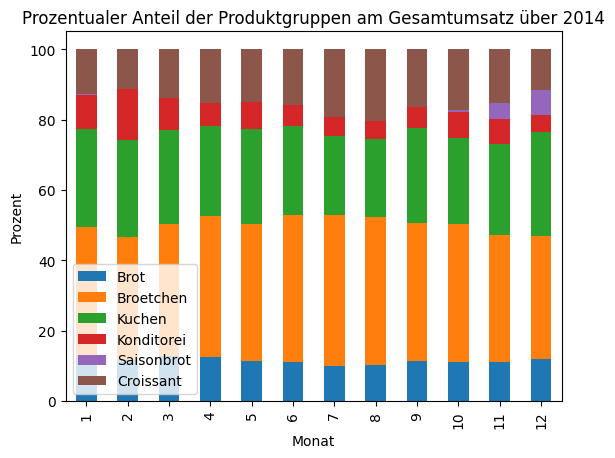

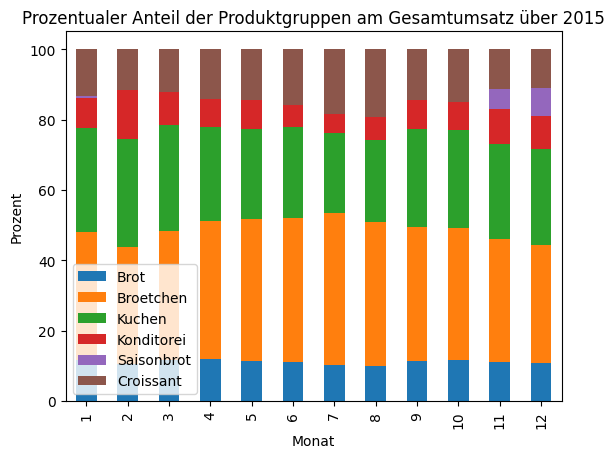

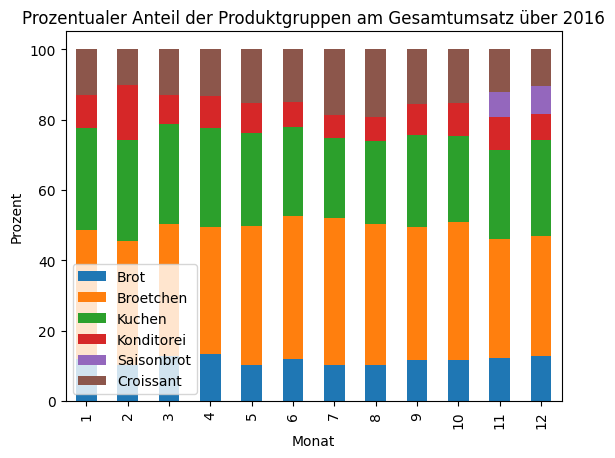

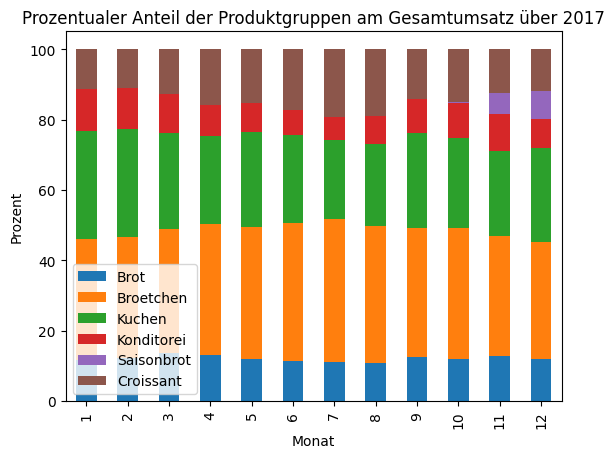

In [24]:
#für die einzelnene Jahre
data_grouped2 = calculate_percentage(data_2014)
plot_percentage(data_grouped2, 2014)

data_grouped2 = calculate_percentage(data_2015)
plot_percentage(data_grouped2, 2015)

data_grouped2 = calculate_percentage(data_2016)
plot_percentage(data_grouped2, 2016)

data_grouped2 = calculate_percentage(data_2017)
plot_percentage(data_grouped2, 2017)





In [25]:
#i want to have all the plots for the years 2013-2017 in one plot
def plot_gesamtumsatz_all(data):
    data_grouped = data.groupby(['year', 'month']).sum().reset_index()
    data_grouped = data_grouped.rename(columns={'Umsatz_total': 'Gesamtumsatz'})
    
    fig = px.bar(data_grouped, x='month', y='Gesamtumsatz', color='year', title='Umsatz 2013-2017 nach Monaten')
    fig.update_xaxes(title_text='Monat')
    fig.update_yaxes(title_text='Umsatz in Euro')
    fig.update_xaxes(tickvals=[1,2,3,4,5,6,7,8,9,10,11,12], ticktext=['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember'])
    fig.show()

plot_gesamtumsatz_all(data)

In [26]:
#wie ist der Umsatz der einzelnen Produktgruppen nach Wochentagen verteilt
def plot_produktgruppen(data, year):
    data_grouped = data.groupby('Wochentag').sum().reset_index()
    data_grouped = data_grouped.rename(columns={'Umsatz_total': 'Gesamtumsatz'})

    fig = px.bar(data_grouped, x='Wochentag',y=['Brot', 'Broetchen', 'Kuchen', 'Konditorei', 'Saisonbrot', 'Croissant'], title=f'Gesamtumsatz nach Wochentagen {year}')
    fig.update_xaxes(title_text='Wochentag')
    fig.update_yaxes(title_text='Umsatz in Euro')
    #order the days in the plot on the x-axis
    fig.update_xaxes(categoryorder='array', categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    fig.show()
    #print(data_grouped)
    

plot_produktgruppen(data, '2013-2017')

In [27]:
#die wochentage mal für jedes jahr anschauen
plot_produktgruppen(data_2013, 2013)
plot_produktgruppen(data_2014, 2014)
plot_produktgruppen(data_2015, 2015)



Hat das Anlaufen von kreuzfahrtschiffen einen Einflus auf den umsatz?   

In [28]:
#plotten der umsätze aus dem monat Juli 2014 jeden Tag als scatterplot
fig = px.scatter(data_2014[data_2014['month'] == 7], x='Datum', y='Umsatz_total', title='Umsatz Juli 2014', color='Ship')
#Datum auf der x-achse pro tag anzeigen
fig.update_xaxes(tickvals=data_2014[data_2014['month'] == 7]['Datum'].unique())
fig.show()

In [29]:
#Umsatz über alle jahe hinweg als scatterplot mit ship als color
fig = px.scatter(data, x='Datum', y='Umsatz_total', title='Umsatz 2013-2017', color='Ship')
fig.show()

In [ ]:
#berechnen ob es eine korellation zwischen dem Umsatz und der Splate Ship gibt
#ship data zu 0 und 1 umwandeln um die korellation zu berechnen
data['Ship'] = data['Ship'].replace(False, 0)
data['Ship'] = data['Ship'].replace(True, 1)

#data_2014['Ship'] = data_2014['Ship'].astype(in
correlation = data[['Umsatz_total', 'Ship']].corr()
print(correlation)



# Fit the linear model
mod = smf.ols(' Umsatz_total ~Ship', data=data).fit()

# Print the summary
print(mod.summary())



              Umsatz_total      Ship
Umsatz_total      1.000000  0.216139
Ship              0.216139  1.000000
                            OLS Regression Results                            
Dep. Variable:           Umsatz_total   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     89.04
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.14e-20
Time:                        10:25:42   Log-Likelihood:                -12852.
No. Observations:                1819   AIC:                         2.571e+04
Df Residuals:                    1817   BIC:                         2.572e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

Wie wirkt sich das wetter auf den Umsatz aus? Dafür erstmal schauen welche wetter verteilungen wir so haben und dann wie sich diese auf den Umsatz auswirken

In [35]:
#temperaturverteilung über die jahre hinweg als scatterplot nach temperaturen

# Combine temperature factors into a single categorical variable
def categorize_temp(row):
    if row['Temp_Very_Cold'] == 1:
        return 'Very Cold'
    elif row['Temp_Cold'] == 1:
        return 'Cold'
    elif row['Temp_Mild'] == 1:
        return 'Mild'
    elif row['Temp_Warm'] == 1:
        return 'Warm'
    elif row['Temp_Hot'] == 1:
        return 'Hot'
    else:
        return 'Unknown'

data['Temperature_Category'] = data.apply(categorize_temp, axis=1)

# Create scatter plot
fig = px.scatter(data, x='Datum', y='Umsatz_total', 
                 color='Temperature_Category',
                 title='Temperaturverteilung 2013-2017')

# Show the plot
fig.show()



In [38]:
#get the same plot for each year
data_2013['Temperature_Category'] = data_2013.apply(categorize_temp, axis=1)
data_2014['Temperature_Category'] = data_2014.apply(categorize_temp, axis=1)
data_2015['Temperature_Category'] = data_2015.apply(categorize_temp, axis=1)
data_2016['Temperature_Category'] = data_2016.apply(categorize_temp, axis=1)
data_2017['Temperature_Category'] = data_2017.apply(categorize_temp, axis=1)

#plot for 2014

fig = px.scatter(data_2014, x='Datum', y='Umsatz_total',    
                 color='Temperature_Category',
                 title='Temperaturverteilung 2013')
fig.show()


/tmp/ipykernel_2708/1775462377.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2708/1775462377.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2708/1775462377.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2708

In [ ]:
#zählen welche temperaturen am häufigsten vorkommen pro Jahr
def count_temp(data):
    data_grouped = data.groupby('Temperature_Category').size().reset_index(name='Count')
    data_grouped = data_grouped.sort_values(by='Count', ascending=False)
    print(data_grouped)

count_temp(data_2014)
count_temp(data_2015)


  Temperature_Category  Count
2                 Mild    164
0                 Cold    125
4                 Warm     41
3            Very Cold     15
1                  Hot     12
  Temperature_Category  Count
2                 Mild    191
0                 Cold    123
4                 Warm     29
3            Very Cold     10
1                  Hot      7
